v1 + v2 = [3 3]
Dot product = 4
Norm of v1 = 2.23606797749979


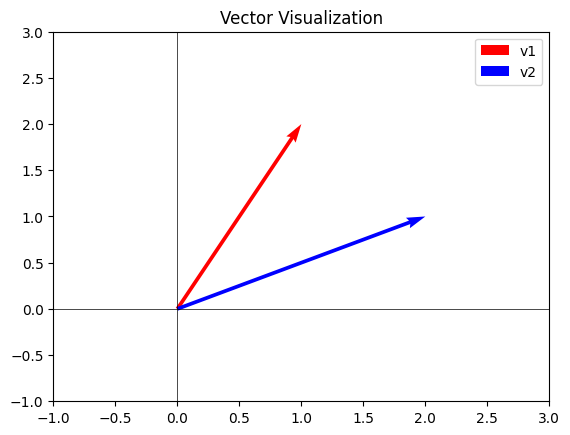

In [2]:
"""
====================================================
📘 Math & Probability Learning Script with Visuals
====================================================
This script covers:
1. Vectors & Matrices
2. Eigenvalues & Eigenvectors
3. Probability Distributions
4. Bayes’ Theorem

Each section has:
- Markdown-style explanations
- Python code
- Visualizations using matplotlib
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import networkx as nx

# ====================================================
# 🔹 1. Vectors & Matrices
# ====================================================
"""
Steps:
1. Import NumPy (done above).
2. Define vectors and matrices as arrays.
3. Perform operations: addition, dot product, transpose.
4. Visualize vectors on 2D plane.
"""

# Vectors
v1 = np.array([1, 2])
v2 = np.array([2, 1])

print("v1 + v2 =", v1 + v2)
print("Dot product =", np.dot(v1, v2))
print("Norm of v1 =", np.linalg.norm(v1))

# Plot vectors
plt.figure()
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Vector Visualization")
plt.show()


Eigenvalues: [3. 2.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


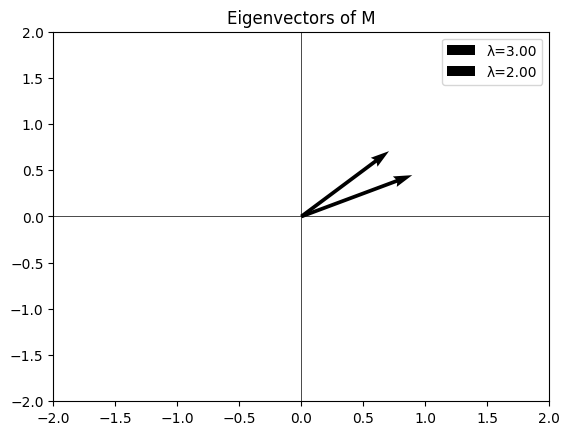

In [3]:
# ====================================================
# 🔹 2. Eigenvalues & Eigenvectors
# ====================================================
"""
Steps:
1. Define a square matrix.
2. Use numpy.linalg.eig to compute eigenvalues/eigenvectors.
3. Visualize eigenvectors as arrows.
"""

M = np.array([[4, -2],
              [1,  1]])

eigenvalues, eigenvectors = np.linalg.eig(M)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Plot eigenvectors
plt.figure()
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i].real
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
               label=f'λ={eigenvalues[i]:.2f}')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.title("Eigenvectors of M")
plt.show()


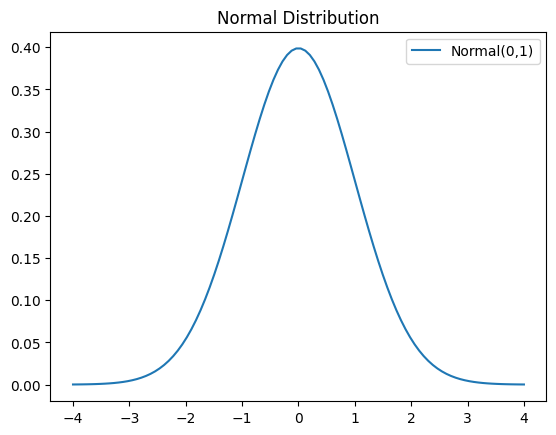

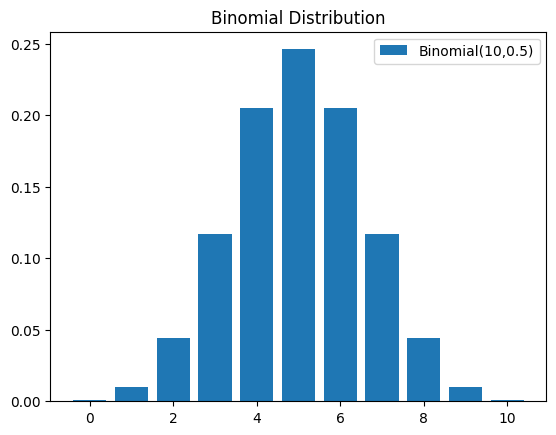

In [4]:
# ====================================================
# 🔹 3. Probability Distributions
# ====================================================
"""
Steps:
1. Use scipy.stats for common distributions.
2. Visualize PDF/PMF for Normal and Binomial distributions.
"""

# Normal distribution
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, 0, 1)

plt.figure()
plt.plot(x, y, label="Normal(0,1)")
plt.title("Normal Distribution")
plt.legend()
plt.show()

# Binomial distribution
n, p = 10, 0.5
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.figure()
plt.bar(x, y, label="Binomial(10,0.5)")
plt.title("Binomial Distribution")
plt.legend()
plt.show()


Probability of having the disease given a positive test: 0.16666666666666669


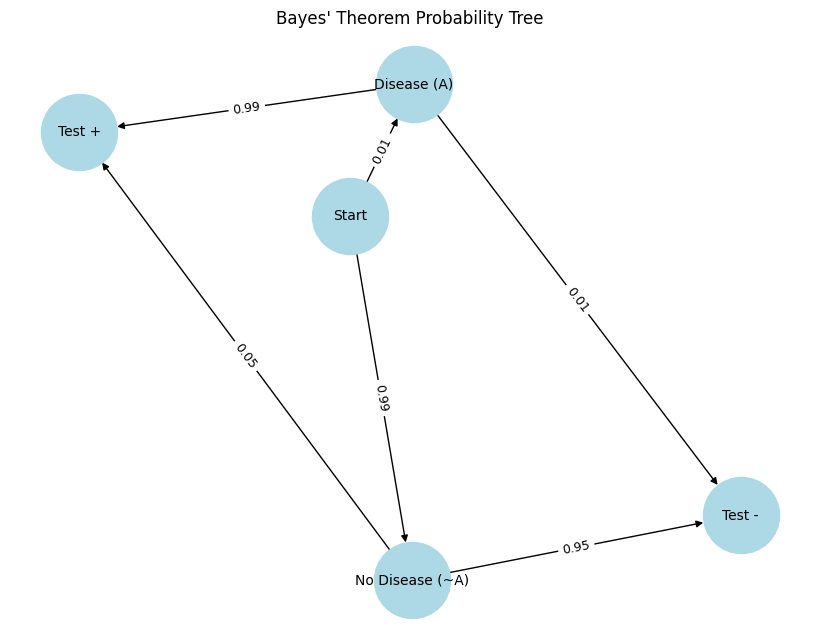

In [5]:
# ====================================================
# 🔹 4. Bayes’ Theorem
# ====================================================
"""
Formula:
    P(A|B) = [ P(B|A) * P(A) ] / P(B)

Steps:
1. Define prior probability P(A), P(~A).
2. Define likelihoods P(B|A), P(B|~A).
3. Compute marginal probability P(B).
4. Apply Bayes' formula.
"""

# Probabilities
P_A = 0.01        # Probability of disease
P_notA = 1 - P_A
P_B_given_A = 0.99       # Positive test if diseased
P_B_given_notA = 0.05    # False positive rate

# Total probability of positive test
P_B = P_B_given_A * P_A + P_B_given_notA * P_notA

# Posterior probability
P_A_given_B = (P_B_given_A * P_A) / P_B

print("Probability of having the disease given a positive test:", P_A_given_B)

# Visualize as probability tree
G = nx.DiGraph()
G.add_edge("Start", "Disease (A)", prob=P_A)
G.add_edge("Start", "No Disease (~A)", prob=P_notA)
G.add_edge("Disease (A)", "Test +", prob=P_B_given_A)
G.add_edge("Disease (A)", "Test -", prob=1-P_B_given_A)
G.add_edge("No Disease (~A)", "Test +", prob=P_B_given_notA)
G.add_edge("No Disease (~A)", "Test -", prob=1-P_B_given_notA)

pos = nx.spring_layout(G, seed=42)
edge_labels = {(u, v): f"{d['prob']:.2f}" for u, v, d in G.edges(data=True)}

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.title("Bayes' Theorem Probability Tree")
plt.show()
